# Visualizing different aspects of Rental Ad data (monthly renting)

## Import packages and load data files

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

areas_dict = json.load(open("data/areas_dict.csv"))
cleaned_data_csv = 'data/cleaned_monthly.csv'

df_monthly = pd.read_csv(cleaned_data_csv, index_col=0)
raw_df_monthly = df_monthly

## Investigate text in 'propery_description' column

### Ad Description Word Cloud

67569


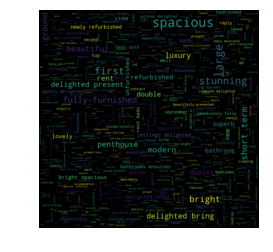

In [97]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

stopwords = set(STOPWORDS)
add_stopwords = ["st","th","ray","cooke","also","property","savills","located","sq","dng","estate","agent","redmont","smith","butler","sherry","fitzgerald","gillespie","auctioneers","one","two","three","month","email","october","november", "apt","available", "call", "enquiries","please","apartment","dublin","bedroom","now","floor","bed","let","letting","will"]
for sw in add_stopwords:
    stopwords.add(sw)
    
square_mask = np.array(Image.open("square.jpg"))
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=60, max_words=66931, mask=square_mask, stopwords=stopwords) \
    .generate(desc_text_clean.to_string())
print(len(desc_text_clean.to_string()))
wordcloud.to_file("square1.jpg")   
# Display the generated image the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams["figure.figsize"] = [20,20]
plt.figure()
plt.show()


#### Price per area scatterplot

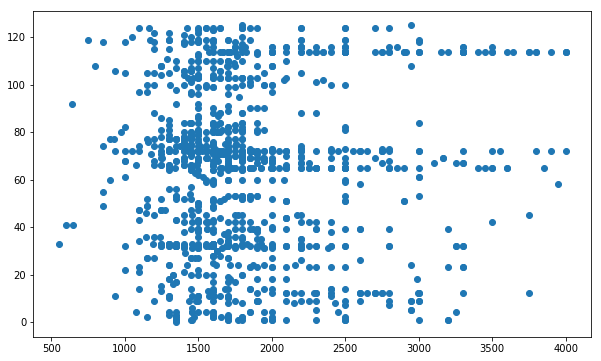

In [98]:
x = df_monthly['price']
y = df_monthly['area']
plt.rcParams["figure.figsize"] = [10,6]
plt.figure()
plt.scatter(x, y)
plt.show()

#### Histograms

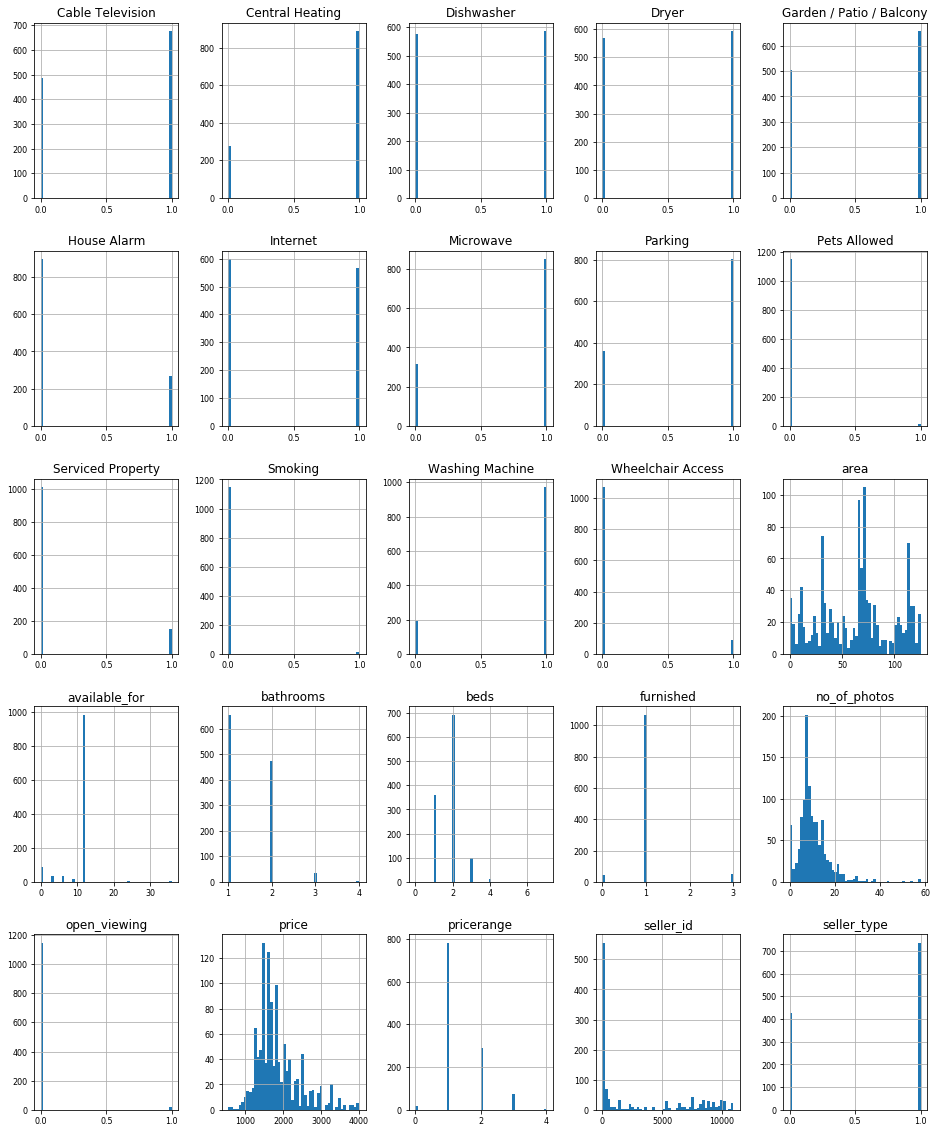

In [99]:
df_monthly.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

#### Correlations

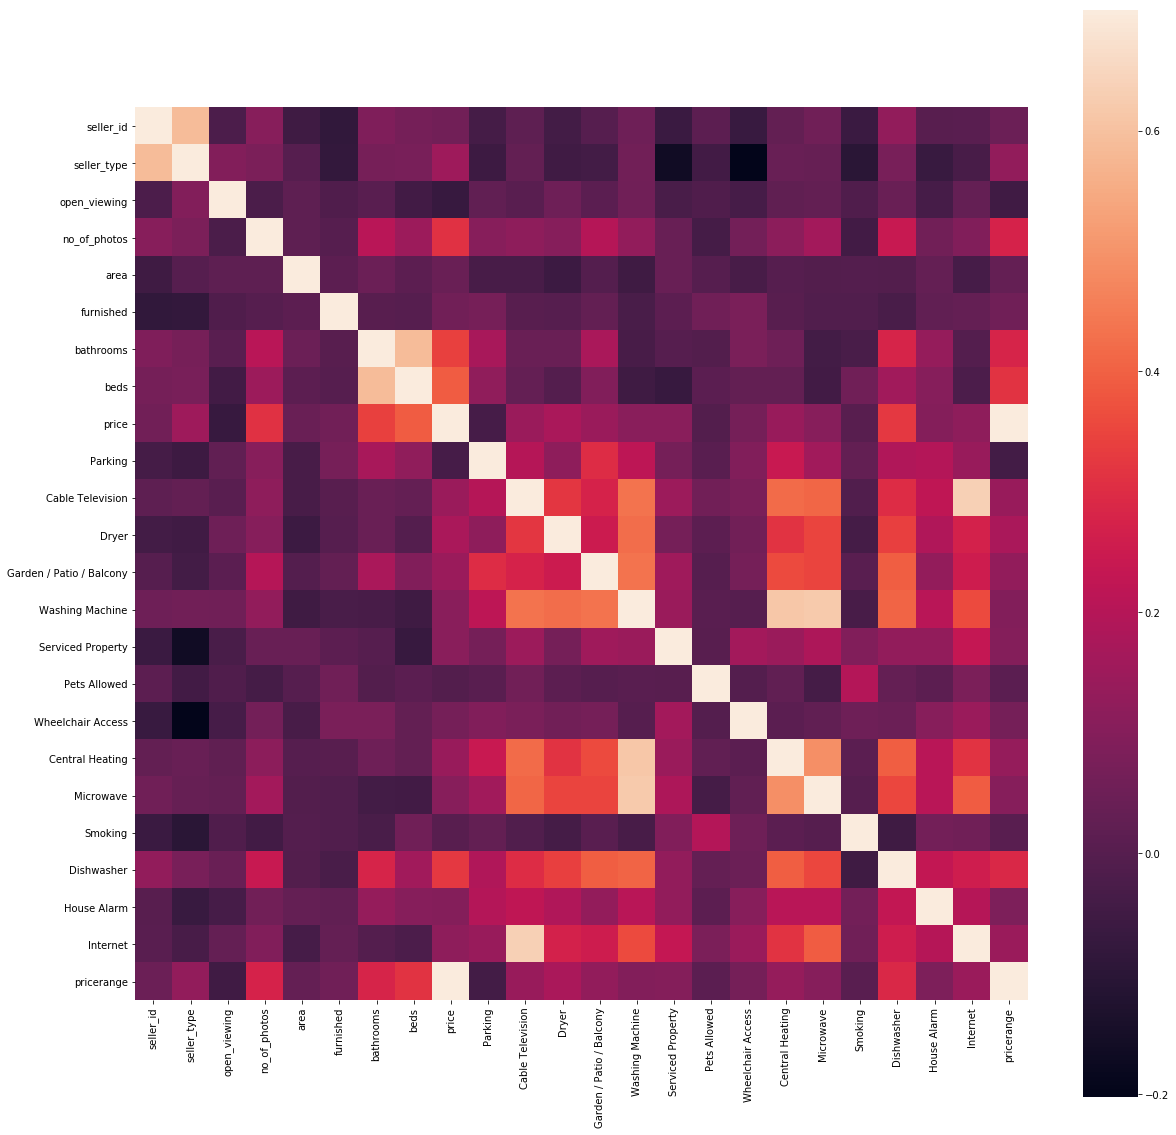

In [100]:
#correlation matrix
corrmat = df_monthly.drop('available_for', 1).corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.7, square=True);

Features that correlate most with the monthly rent price are number of no_of_photos, beds and bathrooms, as well as 'dishwasher'...

In [101]:
df_monthly['price'].describe()

count    1164.000000
mean     1867.312715
std       586.368396
min       550.000000
25%      1500.000000
50%      1700.000000
75%      2100.000000
max      4000.000000
Name: price, dtype: float64

#### Show price distibution for number of beds

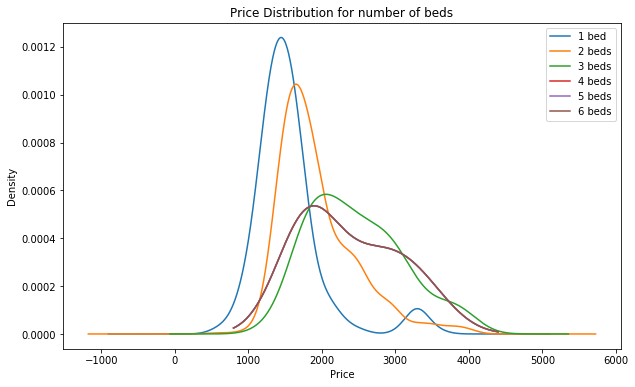

In [102]:
df_monthly.price[(df_monthly.beds == 1.0)].plot(kind='kde', label='1 bed')    
df_monthly.price[(df_monthly.beds == 2.0)].plot(kind='kde', label='2 beds')      
df_monthly.price[(df_monthly.beds == 3.0)].plot(kind='kde', label='3 beds')      
df_monthly.price[(df_monthly.beds == 4.0)].plot(kind='kde', label='4 beds') 
df_monthly.price[(df_monthly.beds == 4.0)].plot(kind='kde', label='5 beds')    
df_monthly.price[(df_monthly.beds == 4.0)].plot(kind='kde', label='6 beds') 

plt.xlabel("Price")    
plt.title("Price Distribution for number of beds")

plt.legend()

#### Showing price distribution for the most common areas

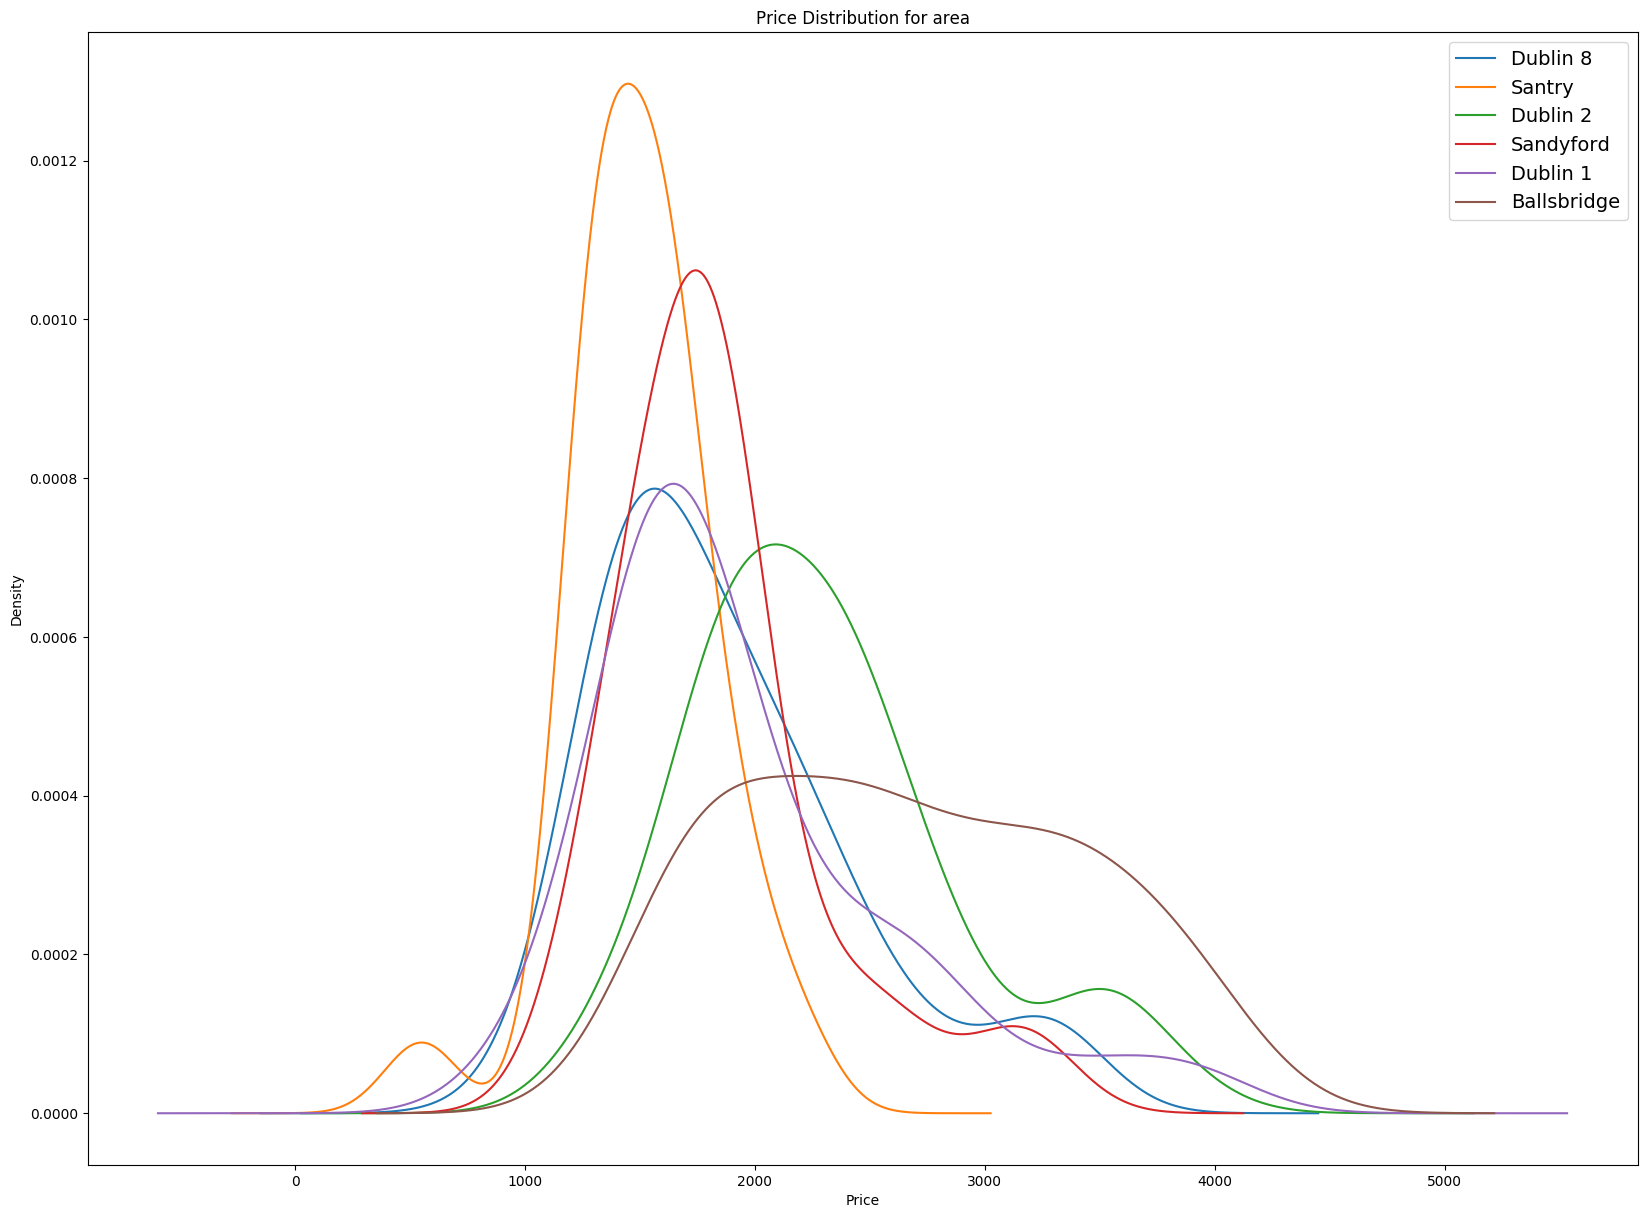

In [103]:
fig = plt.figure(figsize=(20, 15), dpi=100)

for key, value in areas_dict.items():
    count = len(df_monthly.price[(df_monthly.area == value)])
    if count > 25:
        df_monthly.price[(df_monthly.area == value)].plot(kind='kde', label=key )
        
plt.xlabel("Price")    
plt.title("Price Distribution for area")
plt.legend(prop={'size': 14})

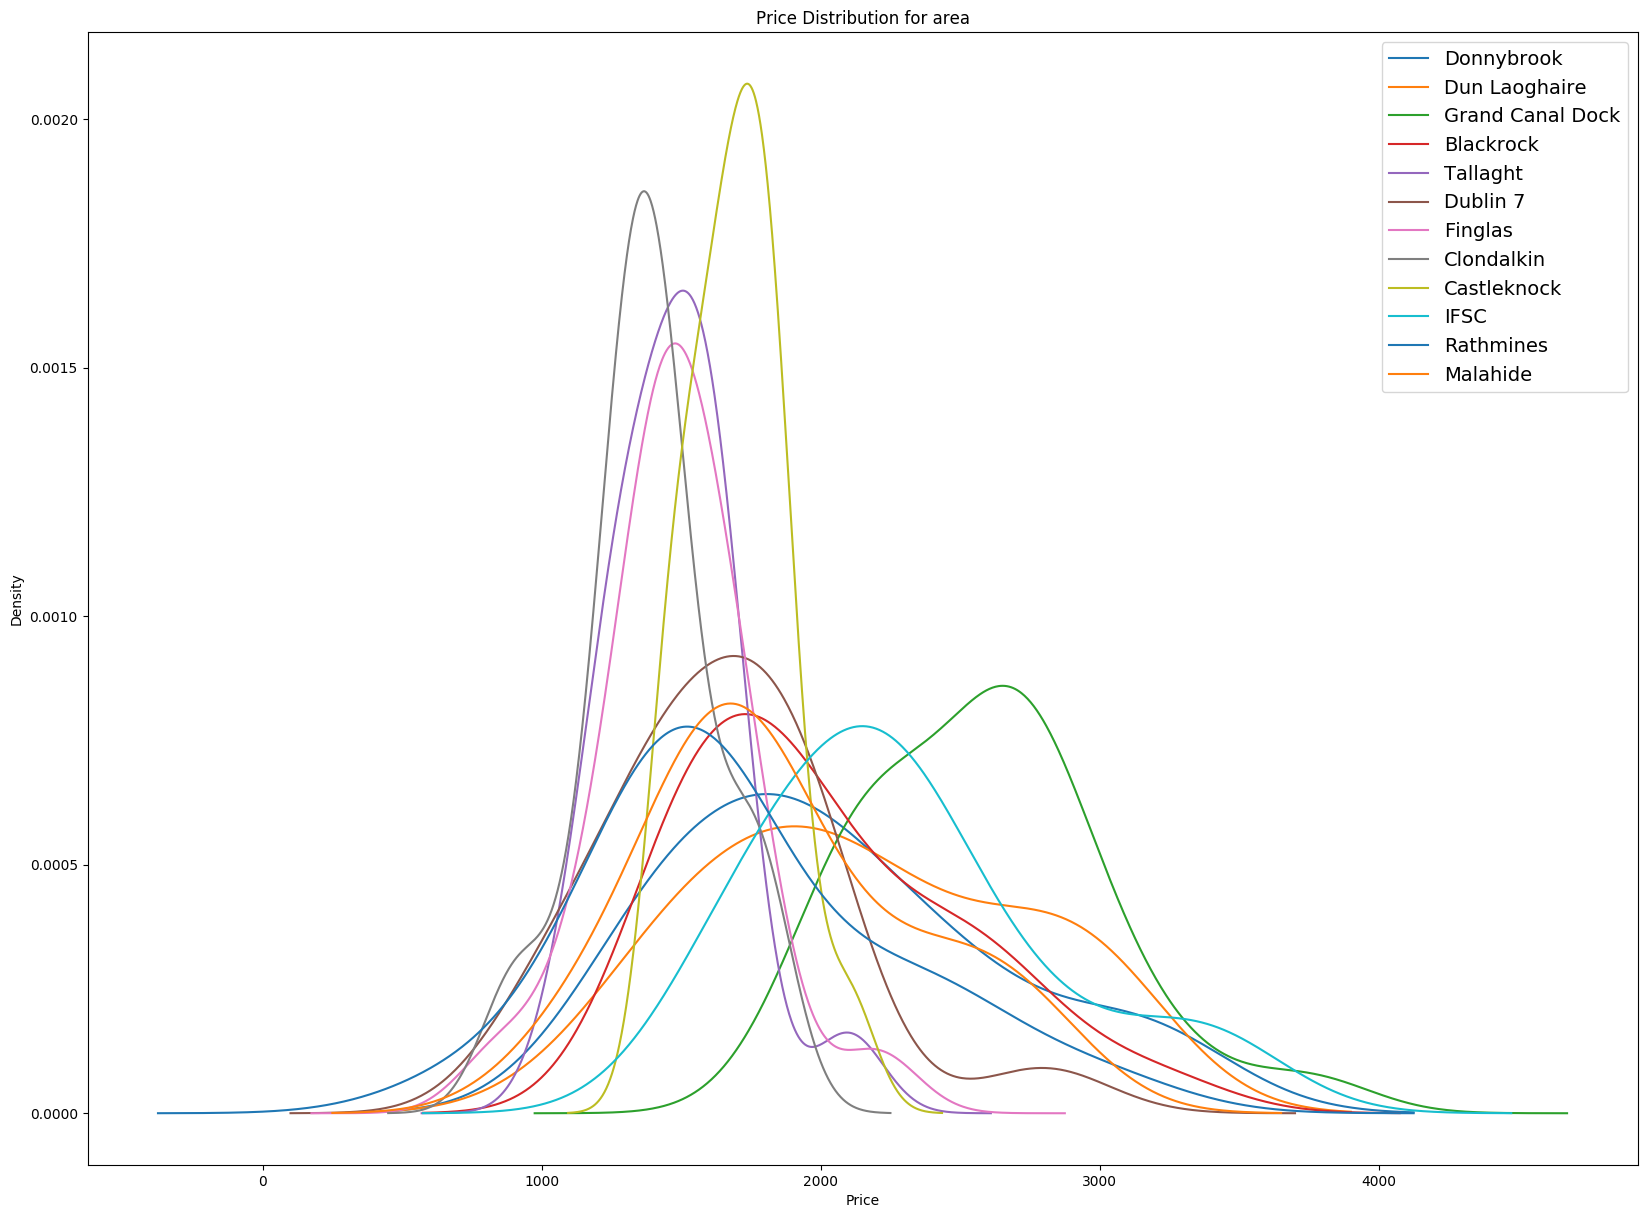

In [104]:
fig = plt.figure(figsize=(20, 15), dpi=100)
for key, value in areas_dict.items():
    count = len(df_monthly.price[(df_monthly.area == value)])
    if (count > 17) & (count <= 25 ):
        df_monthly.price[(df_monthly.area == value)].plot(kind='kde', label=key )
        
plt.xlabel("Price")    
plt.title("Price Distribution for area")
plt.legend(prop={'size': 14})